In [2]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt 
# from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split
from Orange.classification import tree
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')

In [ ]:
Data.isnull().any():

In [3]:
df1 = Data.dropna(axis=0,how='any')
#Data = Data.fillna(method='ffill')
Y = df1['Class']
X = df1.drop('Class', axis = 1)

In [ ]:
df1.corr();

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


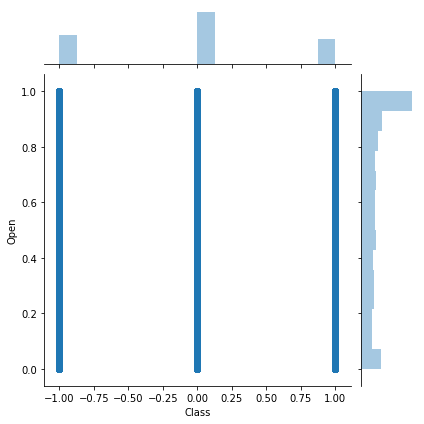

In [4]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="Class",y="Open",data=df1)

In [5]:
Num_cols = len (df1.columns)
Num_cols
df1.shape
df1.ndim
row_count = 0
  
# iterating over indices 
for col in df1.index: 
    row_count += 1
  
# print the row count 
print(row_count) 

4075


In [3]:
Epsilon = 0.2
delta = 0.1
h_aprox =40320 # len (df1.columns)
dimVC =h_aprox   # Poner aqui la dimVC

def n_min(Epsilon,h_aprox,delta):
    n=int(np.ceil((1/Epsilon)*(np.log(h_aprox) + np.log(1/delta))))
    return n
n=n_min(Epsilon,h_aprox,delta)
n

65

In [11]:
X.shape[0]

4075

In [13]:
Xlen=[]

for n in range(n,len(X),10):
    X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X, Y, train_size = n/X.shape[0], random_state=19)
    X1_va, X1_ts, Y1_va, Y1_ts = train_test_split(X1_ts, Y1_ts, train_size = 0.5, random_state=19)
    #Xlen[n]=len(X1_tr)
len(X1_tr)

4073

### $\eta$ minimo estimado

In [14]:
#n_min (Epsilon,h_aprox,delta)
X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X, Y, train_size = n/X.shape[0], random_state=123)

In [15]:
X1_va, X1_ts, Y1_va, Y1_ts = train_test_split(X1_ts, Y1_ts, train_size = 0.5, random_state=19)

# AQUI EL ALGORITMO USANDO X1

### $\eta$ minimo optimo

In [33]:
# Binarize the output
y = label_binarize(Y, classes=[-1, 0, 1])
n_classes = y.shape[1]

In [34]:
n_opt = int(np.ceil((1/Epsilon)*(np.log(dimVC) + np.log(1/delta))))
X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, y, train_size = n_opt/X.shape[0], random_state=123)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# AQUI EL ALGORITMO USANDO X2

In [22]:
from sklearn.metrics import precision_score,confusion_matrix,recall_score,accuracy_score

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [18]:
df1.describe()

,Class,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,Ope_Max,Hig_Max,Low_Max,Vol_Min,Clo_Min,Ope_Min,Hig_Min,Low_Min,Support,Resistance
count,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,...,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000
mean,-0.036319,0.590257,0.580197,0.589019,0.592268,0.344043,0.541117,0.722314,0.496906,0.638600,...,0.723613,0.721381,0.721504,0.546550,0.726893,0.723613,0.721381,0.721504,0.684468,0.393750
std,0.712575,0.326031,0.337365,0.328892,0.327860,0.240709,0.233415,0.313028,0.300572,0.225858,...,0.294296,0.303761,0.300488,0.288637,0.294071,0.294296,0.303761,0.300488,0.283691,0.278469
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.315708,0.277357,0.311266,0.316808,0.166706,0.391286,0.545536,0.245324,0.506869,...,0.546861,0.536755,0.539257,0.333115,0.556980,0.546861,0.536755,0.539257,0.512814,0.167924
50%,0.000000,0.635394,0.625498,0.636634,0.637622,0.292758,0.553456,0.875003,0.497192,0.678596,...,0.823513,0.833252,0.829943,0.534658,0.830793,0.823513,0.833252,0.829943,0.770584,0.349522
75%,0.000000,0.898464,0.905599,0.900373,0.904023,0.477052,0.702674,0.955035,0.746276,0.807013,...,0.983995,0.993983,0.992667,0.773139,0.991234,0.983995,0.993983,0.992667,0.923285,0.573778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
N=range(n_opt,round(len(X)),10)

In [37]:
regressor = LinearRegression()  
regressor.fit(X2_tr,Y2_tr) #training the algorithm
for i in range(len(N)):
    X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, y, train_size = N[i]/X.shape[0], random_state=19)
    # fit the model with data
    regressor.fit(X2_tr,Y2_tr) #training the algorithm
    y_pred_=regressor.predict(X2_ts)
    accuracy_score(Y2_ts, y_pred_) 
   # accur[i] = accuracy_score(Y2_ts, y_pred_) 
    #Conf_Mat[i,:,:] = confusion_matrix(Y2_ts, y_pred_)
    #Press[i]=precision_score(Y2_ts, y_pred_,average='macro')
    #Recall[i]=recall_score(Y2_ts, y_pred_, average='macro')
    
   


C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

In [ ]:
y_pred = regressor.predict(X2_ts)

In [ ]:
df = pd.DataFrame({'Actual': Y2_ts, 'Predicted': y_pred})
df.head(5)

In [ ]:
y_pred

In [ ]:
df2 = df.head(100)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
len(X2_ts)

In [ ]:
#plt.scatter(X2_ts, Y2_ts,  color='gray')
plt.plot(X2_ts, y_pred, color='red') #, linewidth=2
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y2_ts, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y2_ts, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y2_ts, y_pred)))

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

# Regresion logística

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score,confusion_matrix,recall_score,accuracy_score

https://stackoverflow.com/questions/45890328/sklearn-metrics-for-multiclass-classification

In [ ]:
n_opt = int(np.ceil((1/Epsilon)*(np.log(dimVC) + np.log(1/delta))))
N=range(n_opt,round(len(X)),10)
accur=np.zeros(int((len(X)-n_opt)/10))
Conf_Mat= np.zeros(shape=(int((len(X)-n_opt)/10),3,3))
Press=np.zeros(int((len(X)-n_opt)/10))
Recall=np.zeros(int((len(X)-n_opt)/10))
R_rta=pd.DataFrame(accur,Conf_Mat)
R_rta.all()

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

for i in range(len(N)):
    X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, Y, train_size = N[i]/X.shape[0], random_state=19)
    # fit the model with data
    logreg.fit(X2_tr,Y2_tr)
    y_pred_lg=logreg.predict(X2_ts)
    accur[i] = accuracy_score(Y2_ts, y_pred_lg)
    Conf_Mat[i,:,:] = confusion_matrix(Y2_ts, y_pred_lg)
    Press[i]=precision_score(Y2_ts, y_pred_lg,average='macro')
    Recall[i]=recall_score(Y2_ts, y_pred_lg, average='macro')
    


In [ ]:
Press[350]

In [ ]:
num=list(range(len(accur)))
accur;

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(num,accur, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Muestra')

plt.subplot(3, 1, 2)
plt.plot(num, Press, '.-')
plt.xlabel('Precision')
plt.ylabel('Muestra')

plt.subplot(3, 1, 3)
plt.plot(num, Recall, '.-')
plt.xlabel('Recall')
plt.ylabel('Muestra')
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y2_ts, y_pred_lg))
print("Precision de cada clase:",metrics.precision_score(Y2_ts, y_pred_lg, average=None))
print("Recall de cada clase:",metrics.recall_score(Y2_ts, y_pred_lg, average=None))
print("Precision razon total:",metrics.precision_score(Y2_ts, y_pred_lg,average='micro'))
print("Recall razon total:",metrics.recall_score(Y2_ts, y_pred_lg, average='micro'))

In [ ]:
y_pred_proba = logreg.predict_proba(X2_ts)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y2_ts,  y_pred_proba)
auc = metrics.roc_auc_score(Y2_ts, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#INTENTANDO QUE RECONOZCA TRES ESTADOS
LR_m=LogisticRegression(multi_class="multinomial",solver ="newton-cg").fit(X2_tr,Y2_tr)
#
y_pred_LM=LR_m.predict(X2_ts)

In [ ]:
cnf_matrix_m = metrics.confusion_matrix(Y2_ts, y_pred_LM)
cnf_matrix_m

In [ ]:
class_names=[-1,0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')